In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMD', 'AMZN', 'ANET', 'APPH', 'AXON',
    'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG', 'DKNG',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'FUV', 'FVRR', 'GH', 'GMED',
    'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU','MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW',
    'PINS', 'PTON', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE',
    'SHOP', 'SPLK', 'SQ', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

67

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-04-02', datetime.date(2022, 4, 2))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  70 of 70 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2513   2022-03-28
2514   2022-03-29
2515   2022-03-30
2516   2022-03-31
2517   2022-04-01
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.996011
2       0.989797
3       0.999371
4       0.988642
5       0.982919
          ...   
2513    1.007145
2514    1.012257
2515    0.993706
2516    0.984347
2517    1.003410
Name: ^GSPC, Length: 2517, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.006705
2,0.990272
3,1.010555
4,0.992713
5,0.982385
...,...
2513,1.034295
2514,1.062178
2515,0.994983
2516,0.992646


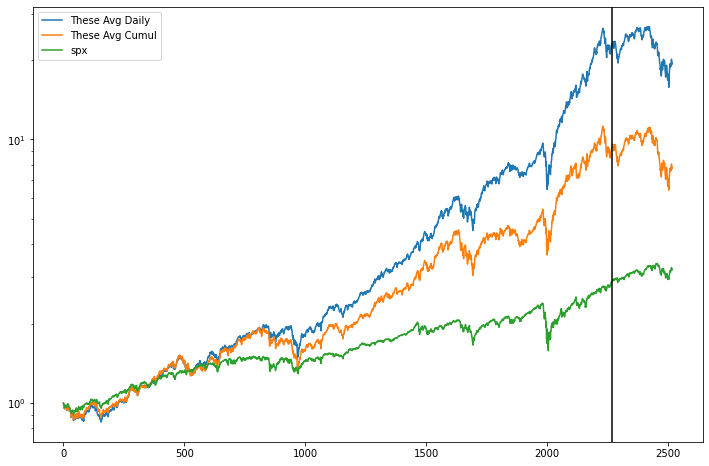

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-04-02,NaN,NaN
1,2012-04-03,0.997752,0.997752
2,2012-04-04,0.979538,0.979500
3,2012-04-05,0.981633,0.981671
4,2012-04-09,0.970146,0.970221


In [10]:
out.tail()

,Date,mine1,mine2
2513,2022-03-28,19.316096,7.802058
2514,2022-03-29,20.125615,8.061235
2515,2022-03-30,19.663873,7.890583
2516,2022-03-31,19.265694,7.739855
2517,2022-04-01,19.424377,7.800149


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

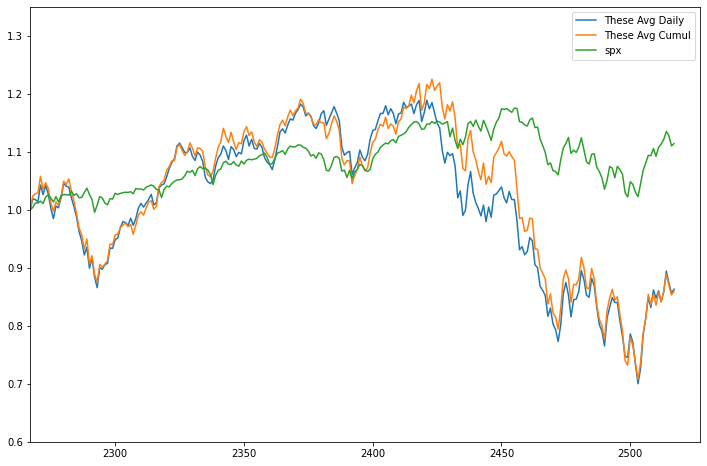

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.35)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1398,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1399,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1400,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1401,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1402,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1398,16.26,16.26,16.990,14.00
1399,15.26,15.26,16.399,15.12
1400,15.24,15.24,15.860,14.77
1401,13.73,13.73,15.430,13.62
1402,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1398,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1399,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1400,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1401,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1402,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.990281
Name: HighMult, dtype: float64


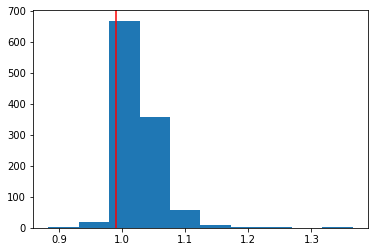

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0140351134753016


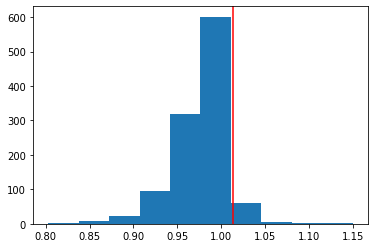

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0140351134753016, 0.990280953894541)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0081245098175693, 0.9942610635128043)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1398,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1399,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1400,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1401,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1402,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0110000727070427,
 0.9917947108636659,
 1.0174909304081967,
 0.9879597764860499)

In [27]:
get_hilo_mults(aapl)

(1.0063710924177862,
 0.9957754794864833,
 1.0094983726765392,
 0.9928597115449106)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006371,0.995775,1.009498,0.992860
1,ABMD,1.004040,0.997488,1.004681,0.996973
2,ABNB,1.007402,0.994812,1.011701,0.984217
3,AMD,1.011645,0.992612,1.011446,0.991197
4,AMZN,1.005286,0.996573,1.008406,0.994334


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,174.309998,AAPL
ABMD,338.640015,ABMD
ABNB,173.070007,ABNB
AMD,108.190002,AMD
AMZN,3271.199951,AMZN
...,...,...
ZEN,123.809998,ZEN
ZNGA,9.21,ZNGA
^GSPC,4545.859863,^GSPC
^IXIC,14261.5,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006371,0.995775,1.009498,0.992860,174.309998
1,ABMD,1.004040,0.997488,1.004681,0.996973,338.640015
2,ABNB,1.007402,0.994812,1.011701,0.984217,173.070007
3,AMD,1.011645,0.992612,1.011446,0.991197,108.190002
4,AMZN,1.005286,0.996573,1.008406,0.994334,3271.199951


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv